In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re
from matplotlib.lines import Line2D

1) Загрузите данные по вариантам в ноутбук.

In [3]:
df1 = pd.read_excel("Вариант 1.xlsx", header=2, skipfooter=1)
df1.head()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,117,11,М,341,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8,20,24
1,2,148,12А,М,338,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8,20,24
2,3,152,13,Ж,104,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),NaN,9,22,24
3,4,152,13,М,104,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,9,22,24
4,5,132,11,М,337,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,10,24,24


2) Сделайте описательную статистику полученных данных.

In [4]:
df1.describe()

,№,№ школы,Номер варианта,Устная часть,Первичный балл,Балл,Минимальный балл
count,3048.000000,3048.000000,3048.000000,0.0,3048.000000,3048.000000,3048.0
mean,1524.500000,138.753281,340.787730,NaN,43.573491,72.769029,24.0
std,880.026136,41.793413,39.077186,NaN,8.931816,13.664908,0.0
min,1.000000,104.000000,101.000000,NaN,8.000000,20.000000,24.0
25%,762.750000,126.000000,339.000000,NaN,38.000000,64.000000,24.0
50%,1524.500000,144.000000,342.000000,NaN,45.000000,72.000000,24.0
75%,2286.250000,148.000000,346.000000,NaN,50.000000,82.000000,24.0
max,3048.000000,1106.000000,706.000000,NaN,58.000000,100.000000,24.0


3) Найдите процент учащихся, выполнивших работу ниже среднего.

In [45]:
print(len(df1.loc[df1['Балл'] < df1['Балл'].mean()])*100/len(df1))


51.27952755905512


4) Найти процент учащихся не сдавших экзамен.

In [6]:
(df1['Балл'] < df1['Минимальный балл']).sum() / len(df1) * 100

0.13123359580052493

5) Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

[Text(0.5, 1.0, 'Распределение сдавших/не сдавших')]

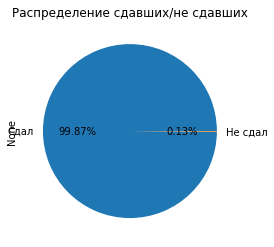

In [7]:
s = (df1['Балл'] >= df1['Минимальный балл']).value_counts()
s.index = s.index.map({False: 'Не сдал', True: 'Сдал'})
s.plot.pie(autopct='%1.2f%%').set(title="Распределение сдавших/не сдавших")

6) Постройте ядерную оценку плотности распределению баллов за экзамен.

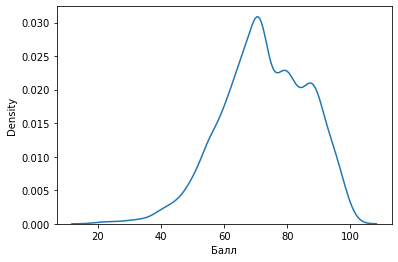

In [8]:
sns.kdeplot(x=df1['Балл'], ax=plt.subplots()[1])

7) Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

<ipython-input-9-6ca8da67dea5>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series({})


[Text(0.5, 1.0, 'Процентное соотношение учащихся по различным оценкам')]

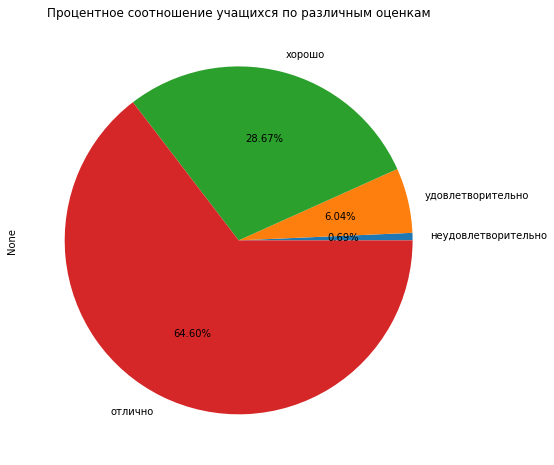

In [9]:
def finder(s, first, second):
    mask = (s >= first) & (s <= second)
    result = mask.sum() / len(s) * 100
    return result

s = pd.Series({})
score = df1['Балл']
s["неудовлетворительно"] = finder(score, 0, 35)
s["удовлетворительно"] = finder(score, 36, 52)
s["хорошо"] = finder(score, 53, 67)
s["отлично"] = finder(score, 68, 100)

s.plot.pie(figsize=(8, 8), autopct='%1.2f%%').set(title='Процентное соотношение учащихся по различным оценкам')

8) Какое процентное соотношение юношей и девушек писало данный экзамен?

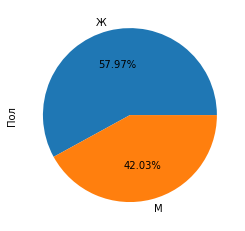

In [10]:
df1['Пол'].value_counts().plot.pie(autopct='%1.2f%%')

9) Сколько школ принимало участие в экзамене?

In [11]:
df1["№ школы"].nunique()

24

10) Сколько всего заданий с кратким ответом? С развернутым ответом?

In [12]:
first_row = df1.head(1)
short_answer = first_row["Задания с кратким ответом"].str.len().item()
long_answer = first_row["Задания с развёрнутым ответом"].str.count(re.compile(r'\d+\(\d+\)')).item()


print(f'Заданий с кратким ответом: {short_answer}')
print(f'Заданий с развернутым ответом: {long_answer}')

Заданий с кратким ответом: 25
Заданий с развернутым ответом: 12


11) Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В, ... Вк Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [13]:
df1['Задания с кратким ответом'].count()

3048

In [14]:
def countingB(s):
    done = 0
    undone = 0
    for lst in s:
        if isinstance(lst, list):
            done+=lst.count('+')
            undone+=lst.count('-') + lst.count('0')
            for i in lst:
                if i.isdigit():
                    done+=int(i)
    overall = done + undone
    return(done/overall * 100, undone/overall * 100)

In [15]:
def countingC(s):
    done = 0
    overall = 0
    for lst in s:
        if isinstance(lst, list):
            for i in range(0, len(lst)-1, 2):
                done+=int(lst[i])
                overall+=int(lst[i+1])
    return done, overall

In [16]:
s1 = df1["Задания с кратким ответом"].str.split('').tolist()
countingB(s1)

(82.884873515746, 17.115126484254002)

12) Аналогично и с типом С (ответы с развернутым ответом)

In [17]:
s2 = df1["Задания с развёрнутым ответом"].str.split('\D+').tolist()
countingC(s2)

(52538, 73152)

13) Сделайте анализ по двум школам:
по всем выполненным заданиям типа В
по заданиям типа С больше 50%
по среднему баллу юношей и девушек

In [18]:
df1.groupby('№ школы').count().iloc[:2]

,№,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
№ школы,,,,,,,,,,
104,91,91,91,91,91,91,0,91,91,91
108,39,39,39,39,39,39,0,39,39,39


In [19]:
df_helper = df1[(df1["№ школы"] == 104) | (df1["№ школы"] == 108)]
df_helper

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
58,59,108,11,М,341,1+-+--0-+++-+-0---------2,1(1)1(3)1(1)3(3)2(2)1(2)0(3)0(3)1(2)0(2)1(1)1(1),NaN,21,43,24
93,94,108,11,М,340,1----+1-+++++-1-----+---3,1(1)1(3)1(1)1(3)2(2)1(2)0(3)0(3)1(2)1(2)1(1)1(1),NaN,24,46,24
172,173,104,11,М,346,0+---+3+++++--1+--++----2,1(1)2(3)1(1)2(3)2(2)1(2)0(3)0(3)1(2)1(2)1(1)0(1),NaN,28,51,24
173,174,108,11,М,343,1++--+1--++++-1--+++----0,1(1)1(3)1(1)2(3)2(2)1(2)1(3)1(3)2(2)1(2)1(1)1(1),NaN,28,51,24
174,175,108,11,М,348,1+---+3-++-++-0-+-+-----2,1(1)2(3)1(1)2(3)1(2)1(2)2(3)0(3)1(2)1(2)1(1)1(1),NaN,28,51,24
...,...,...,...,...,...,...,...,...,...,...,...
2840,2841,108,11,Ж,348,2+++++5+++++++2++++++++-4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)2(3)1(2)2(2)1(1)1(1),NaN,55,94,24
2843,2844,108,11,Ж,345,2+++++5+++++++2++++++++-4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)1(2)1(2)1(1)1(1),NaN,55,94,24
2945,2946,104,11,Ж,341,2+++++5+++++++2++++++-++4,1(1)2(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,56,96,24
2946,2947,104,11,Ж,343,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)2(3)1(2)2(2)1(1)1(1),NaN,56,96,24


In [20]:
df_6 = pd.DataFrame({"Школа": ["104", "108"]})
df_6["Средний балл по Ж"] = [df_helper[(df_helper["Пол"] == "Ж") & (df_helper["№ школы"] == 104)]["Балл"].sum()/df_helper[(df_helper["Пол"] == "Ж") & (df_helper["№ школы"] == 104)].shape[0], df_helper[(df_helper["Пол"] == "Ж") & (df_helper["№ школы"] == 108)]["Балл"].sum()/df_helper[(df_helper["Пол"] == "Ж") & (df_helper["№ школы"] == 108)].shape[0]]
df_6["Средний балл по М"] = [df_helper[(df_helper["Пол"] == "М") & (df_helper["№ школы"] == 104)]["Балл"].sum()/df_helper[(df_helper["Пол"] == "М") & (df_helper["№ школы"] == 104)].shape[0], df_helper[(df_helper["Пол"] == "М") & (df_helper["№ школы"] == 108)]["Балл"].sum()/df_helper[(df_helper["Пол"] == "М") & (df_helper["№ школы"] == 108)].shape[0]]
df_6

,Школа,Средний балл по Ж,Средний балл по М
0,104,73.825397,74.714286
1,108,78.500000,64.800000


In [21]:
s3 = df_helper[df_helper["№ школы"] == 104]["Задания с кратким ответом"].str.split('').tolist()
s4 = df_helper[df_helper["№ школы"] == 108]["Задания с кратким ответом"].str.split('').tolist()
df_6["Процент выполненных заданий B"] = [countingB(s3)[0], countingB(s4)[0]]
df_6

,Школа,Средний балл по Ж,Средний балл по М,Процент выполненных заданий B
0,104,73.825397,74.714286,83.066440
1,108,78.500000,64.800000,82.944489


In [22]:
def more_than_half(s):
    count = 0
    for lst in s:
        done = 0
        overall = 0
        if isinstance(lst, list):
            for i in range(0, len(lst)-1, 2):
                done+=int(lst[i])
                overall+=int(lst[i+1])
        if done >= overall/2:
            count+=1
    return count

In [23]:
s5 = df_helper[df_helper["№ школы"] == 104]["Задания с развёрнутым ответом"].str.split('\D+').tolist()
s6 = df_helper[df_helper["№ школы"] == 108]["Задания с развёрнутым ответом"].str.split('\D+').tolist()
df_6["C больше 50%"] = [more_than_half(s5), more_than_half(s6)]
df_6

,Школа,Средний балл по Ж,Средний балл по М,Процент выполненных заданий B,C больше 50%
0,104,73.825397,74.714286,83.066440,88
1,108,78.500000,64.800000,82.944489,38


In [38]:
fig = px.histogram(df_6, x="Школа", y="Процент выполненных заданий B", color="Школа")
fig.show()